In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
# 

## Load Data

In [3]:
xls = pd.ExcelFile('Data Scientist - PT Max Talent.xlsx')
df = pd.read_excel(xls, 'dataset')

In [4]:
pd.set_option('display.max_colwidth', None)
descrip = pd.read_excel(xls, 'Data Dict',header=1)
descrip.drop(['Unnamed: 0','No'],axis=1,inplace=True)
descrip.head(12)

,Variable,Descripttion
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,Age,Age of customer
9,SizeofFamily,Gender of customer


## Explore and Correcting Data

In [5]:
df

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,Age,SizeofFamily,HourSpendOnApp,...,Complain,Churn,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,DayLogin,QTY,LastDate
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,NaN,2,3.0,...,1,1,11.0,1.0,1.0,5.0,2932.050000,98,526,2021-02-04
1,50002,NaN,Phone,1,8.0,UPI,Male,21.0,2,3.0,...,1,1,15.0,0.0,1.0,0.0,2216.500000,1,730,2021-02-05
2,50003,NaN,Phone,1,30.0,Debit Card,Male,52.0,5,2.0,...,1,1,14.0,0.0,1.0,3.0,2205.133333,78,796,2021-01-25
3,50004,0.0,Phone,3,15.0,Debit Card,Male,63.0,1,2.0,...,0,1,23.0,0.0,1.0,3.0,2457.950000,93,7074,2021-02-22
4,50005,0.0,Phone,1,12.0,CC,Male,23.0,1,NaN,...,0,1,11.0,1.0,1.0,3.0,2376.000000,92,1799,2021-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,10.0,Computer,1,30.0,Credit Card,Male,19.0,1,3.0,...,0,0,18.0,1.0,2.0,4.0,2763.016667,16,7095,2021-05-18
5626,55627,13.0,Mobile Phone,1,13.0,Credit Card,Male,44.0,5,3.0,...,0,0,16.0,1.0,2.0,NaN,4123.350000,41,5141,2021-02-22
5627,55628,1.0,Mobile Phone,1,11.0,Debit Card,Male,53.0,1,3.0,...,1,0,21.0,1.0,2.0,4.0,3417.700000,98,6973,2021-02-19
5628,55629,23.0,Computer,3,9.0,Credit Card,Male,72.0,3,4.0,...,0,0,15.0,2.0,2.0,9.0,3279.833333,48,2995,2021-04-27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CustomerID                   5630 non-null   int64         
 1   Tenure                       5366 non-null   float64       
 2   PreferredLoginDevice         5630 non-null   object        
 3   CityTier                     5630 non-null   int64         
 4   WarehouseToHome              5379 non-null   float64       
 5   PreferredPaymentMode         5630 non-null   object        
 6   Gender                       5630 non-null   object        
 7   Age                          5629 non-null   float64       
 8   SizeofFamily                 5630 non-null   int64         
 9   HourSpendOnApp               5375 non-null   float64       
 10  NumberOfDeviceRegistered     5630 non-null   int64         
 11  PreferedOrderCat             5630 non-null 

In [7]:
# Check และ Drop CustomerID
print(len(df['CustomerID'].unique()))
df.drop('CustomerID',axis=1,inplace=True)

5630


In [8]:
# df.describe().T

In [9]:
norminal = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat',
            'MaritalStatus','Complain']

ordinal = ['CityTier','SatisfactionScore']

numeric = ['Tenure','WarehouseToHome','Age','SizeofFamily','HourSpendOnApp',
           'NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear',
           'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount','DayLogin','QTY']

datetime = ['LastDate']

target = ['Churn']

## - Check abnormal Data

### Check Spelling Mistake for category

In [10]:
# Category
for i in norminal+ordinal:
    print('------')
    print('-- {} --'.format(i))
    print(df[i].value_counts(dropna=False))
    print('------')
    print(' ')

------
-- PreferredLoginDevice --
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
------
 
------
-- PreferredPaymentMode --
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
------
 
------
-- Gender --
Male       3382
Female     2242
ผู้หญิง       3
ชาย           2
หญิง          1
Name: Gender, dtype: int64
------
 
------
-- PreferedOrderCat --
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
------
 
------
-- MaritalStatus --
Married        2985
Single         1792
Divorced        848
โสด               4
แต่งงานแล้ว       1
Name: MaritalStatus, dtype: int64
------
 
------
-- Complain --
0    4026
1    1604
Name: Co

In [11]:
df['MaritalStatus'].replace('โสด','Single',inplace=True)
df['MaritalStatus'].replace('แต่งงานแล้ว','Married',inplace=True)
df['Gender'].replace('ผู้หญิง','Female',inplace=True)
df['Gender'].replace('หญิง','Female',inplace=True)
df['Gender'].replace('ชาย','Male',inplace=True)

In [12]:
for i in norminal+ordinal:
    print('-- {} --'.format(i))
    print(df[i].value_counts(dropna=False))
    print(' ')

-- PreferredLoginDevice --
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
 
-- PreferredPaymentMode --
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
 
-- Gender --
Male      3384
Female    2246
Name: Gender, dtype: int64
 
-- PreferedOrderCat --
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
 
-- MaritalStatus --
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
 
-- Complain --
0    4026
1    1604
Name: Complain, dtype: int64
 
-- CityTier --
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
 
-- SatisfactionScore --
3    1698
1    1164
5    1108
4    1074
2     586
Nam

### Check abnormal data for numeric

In [13]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.000000,16.000000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.000000,20.000000,127.00
Age,5629.0,47.283176,19.183838,-1.0,30.00,47.000000,64.000000,80.00
SizeofFamily,5630.0,3.019183,1.428707,1.0,2.00,3.000000,4.000000,5.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.000000,3.000000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.000000,4.000000,6.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.000000,6.000000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.000000,18.000000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.000000,2.000000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.000000,3.000000,16.00


### Replace few abnormal(may be from human error) value with NaN

In [14]:
# drop QTY = 500000,-500,-10 
# 500000 ไม่ abnormal ก็ outlier

# drop Age = -1
# df1[df1['QTY']<0]['QTY']

# Replace few abnormal(may be from human error) value with NaN, dealing with it later

df['Age'].replace(-1, np.NaN,inplace=True)
df['QTY'].replace(500000, np.NaN,inplace=True)
df['QTY'].replace(-500, np.NaN,inplace=True)
df['QTY'].replace(-10, np.NaN,inplace=True)

In [15]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.000000,16.000000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.000000,20.000000,127.00
Age,5628.0,47.291756,19.174741,15.0,30.75,47.000000,64.000000,80.00
SizeofFamily,5630.0,3.019183,1.428707,1.0,2.00,3.000000,4.000000,5.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.000000,3.000000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.000000,4.000000,6.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.000000,6.000000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.000000,18.000000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.000000,2.000000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.000000,3.000000,16.00


## - Analysis

### Relation between Numeric Data and Target (Churn)

In [16]:
# ปิดในส่วนของ whisker outlier ใน box-plot ออกเพื่อให้เห็น ความสัมพันธ์ของข้อมูลส่วนใหญ่ชัดเจนขึ้น

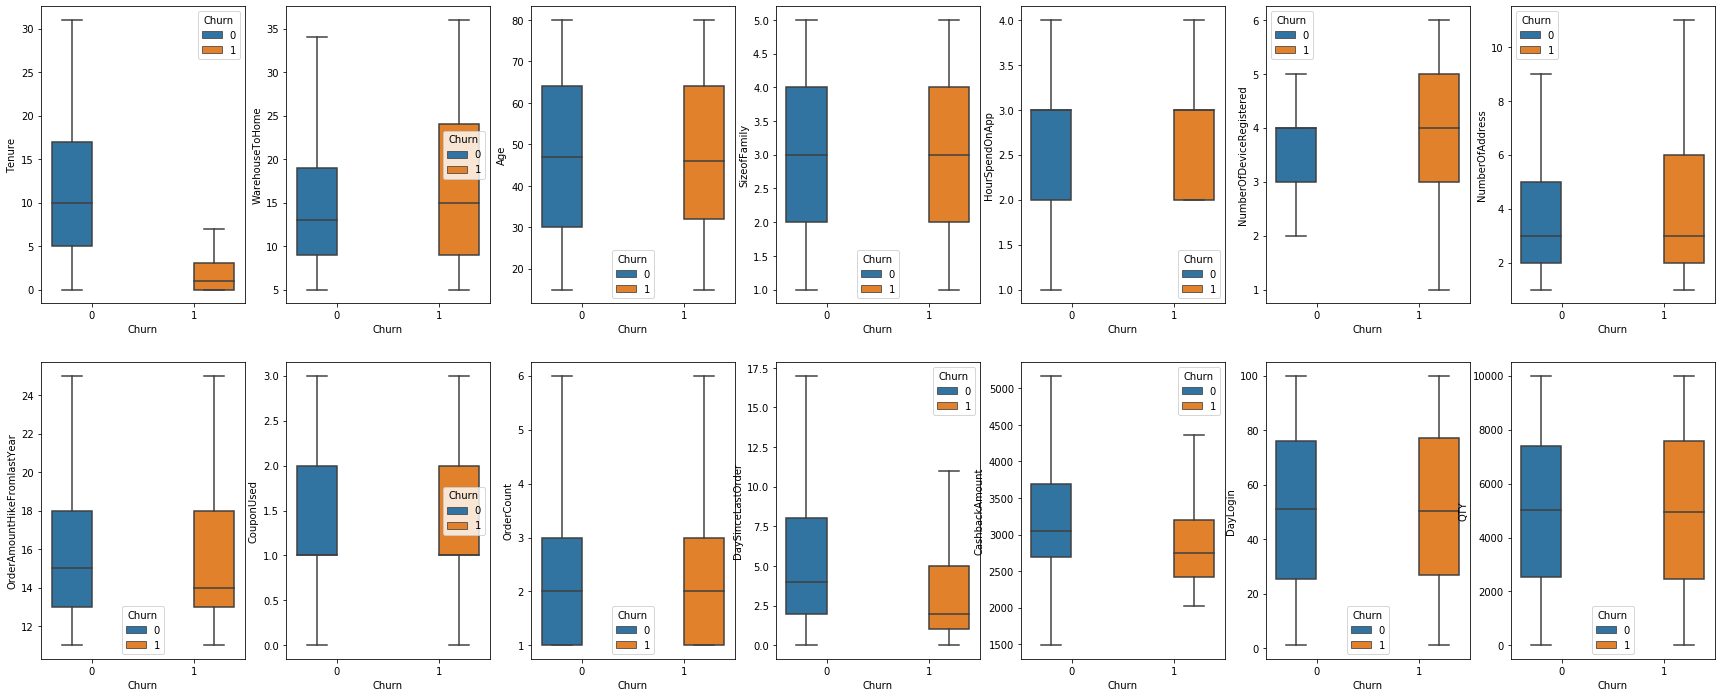

In [17]:
fig, ax = plt.subplots(2, 7, figsize=(30, 12))
k=0
for i in range(2):
    for j in range(7):
        sns.boxplot(y=numeric[k],x = 'Churn', hue = 'Churn',data = df,ax=ax[i][j],showfliers = False)
#         print(numeric[k])
        k=k+1
        if k == 14:
            break

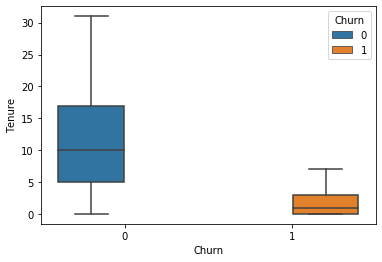

In [18]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 12))
sns.boxplot(y=numeric[0],x = 'Churn', hue = 'Churn',data = df,showfliers = False)

In [19]:
# ส่วนใหญ่ไม่มีความแตกต่าง ที่เห็นได้ชัดมีแค่ Tenure 
# เห็นได้ว่า Customer ที่ Churn มี Tenure ต่ำกว่า ไม่ Churn ค่อนข้างชัดเจน

Text(0.5, 0, 'Tenure')

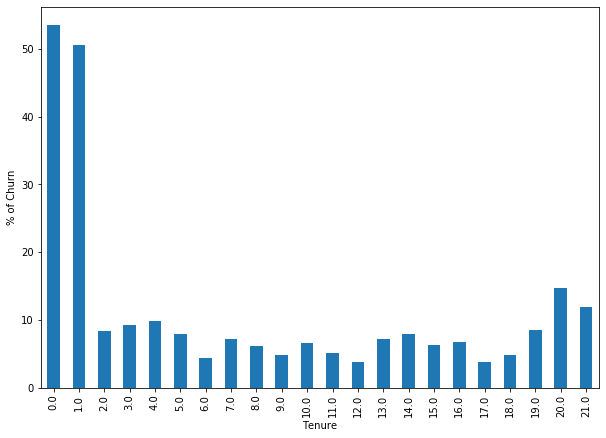

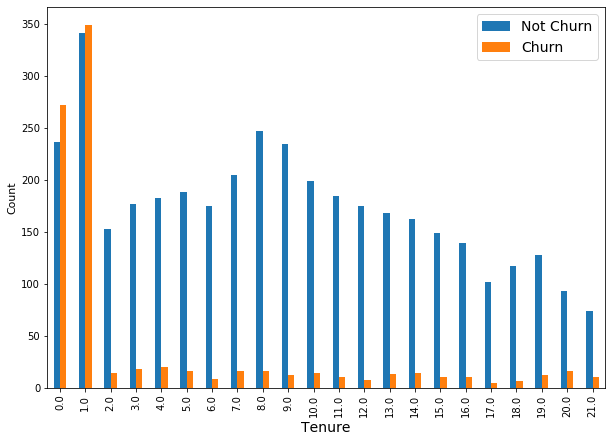

In [20]:
teu_lower25 = df[df['Tenure']<=21]
temp_df = teu_lower25.groupby(['Tenure','Churn']).size().unstack()
temp_df['% of Churn'] = temp_df[1]/(temp_df[0]+temp_df[1])*100
temp_df['% of Churn'].plot(kind='bar',ylabel='% of Churn',grid=False,figsize=(10,7))

## จากการมา plot ดู % การ Churn ของแต่ละ Tenure, 0-1 - % Churn สูงมาก
# Action ที่อาจจะทำได้
# พยายาม acuire ลูกค้าที่มี tenure สูงขึ้น (เวลาการดำรงตำแหน่งในบ.) 
# ยิง ads กลุ่มเป้าหมายนั้นๆ, จัด campaign ต่างๆตามบริษัท


ax1 = teu_lower25.groupby(['Tenure','Churn']).size().unstack().plot(kind='bar',ylabel='Churn',figsize=(10,7))
ax1.legend(['Not Churn','Churn'],fontsize=14)
ax1.set_ylabel('Count',fontdict={'fontsize':11})
ax1.set_xlabel('Tenure',fontdict={'fontsize':14})

In [21]:
# temp_df = df.groupby([pd.cut(df['HourSpendOnApp'], bins=5),'Churn']).size().unstack()
# temp_df['% of Churn'] = temp_df[1]/(temp_df[0]+temp_df[1])*100
# temp_df['% of Churn'].plot(kind='bar')

### Relation between Category Data - Target (Churn)
#### % of Churn by each value of each Category Data

In [22]:
norminal+ordinal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain',
 'CityTier',
 'SatisfactionScore']

In [23]:
category_1 = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat']
category_2 = ['MaritalStatus','Complain','CityTier','SatisfactionScore']

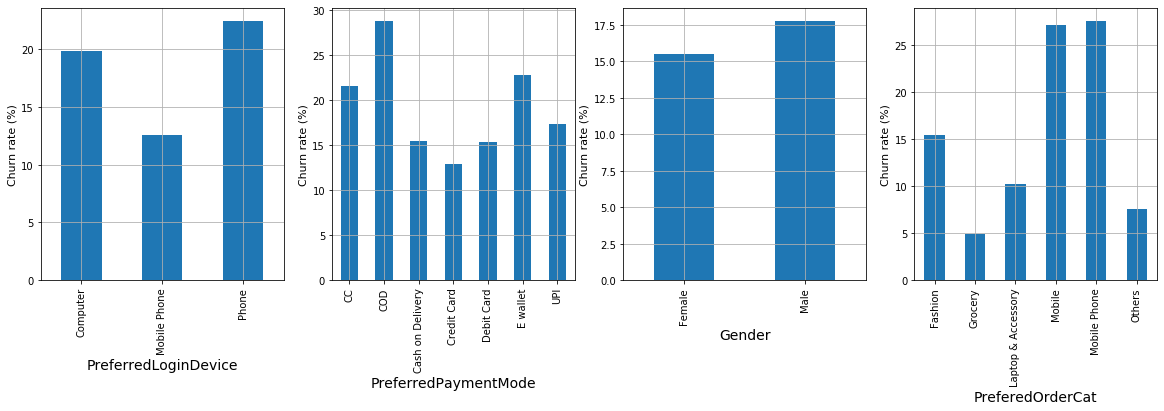

In [24]:
plt.figure(figsize=(20, 5))
for idx,i in enumerate(category_1):
    test_df = df.groupby([i, "Churn"]).size().unstack()
    test_df['% of Churn'] = test_df[1]/(test_df[0]+test_df[1])*100
    plt.subplot(1,4,idx+1)
    ax1= test_df['% of Churn'].plot(kind='bar',grid=True,ylabel='Churn rate (%)')
    ax1.set_ylabel('Churn rate (%)',fontdict={'fontsize':11})
    ax1.set_xlabel(i,fontdict={'fontsize':14})
#     plt.bar(test_df.index,test_df['% of Churn'])
    

interesting = ['PreferredPaymentMode','PreferedOrderCat','SatisfactionScore','MaritalStatus']

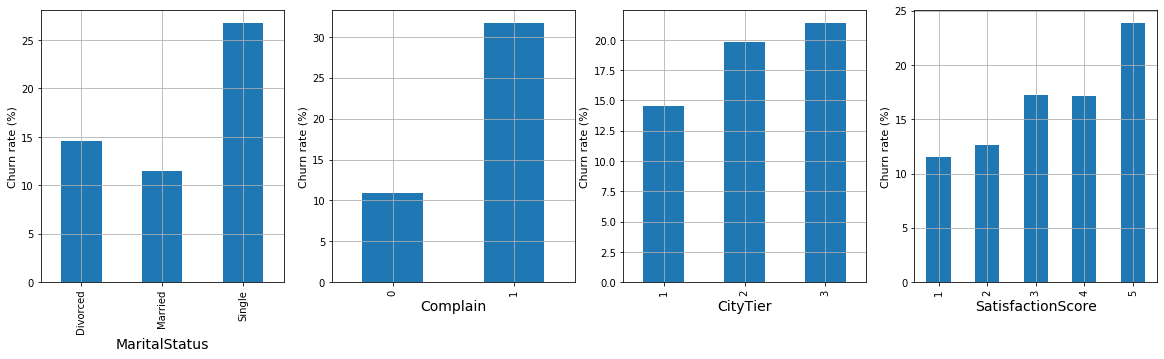

In [25]:
plt.figure(figsize=(20, 5))
for idx,i in enumerate(category_2):
    test_df = df.groupby([i, "Churn"]).size().unstack()
    test_df['% of Churn'] = test_df[1]/(test_df[0]+test_df[1])*100
    plt.subplot(1,4,idx+1)
    ax1 = test_df['% of Churn'].plot(kind='bar',grid=True)
    ax1.set_ylabel('Churn rate (%)',fontdict={'fontsize':11})
    ax1.set_xlabel(i,fontdict={'fontsize':14})
#     plt.bar(test_df.index,test_df['% of Churn'])

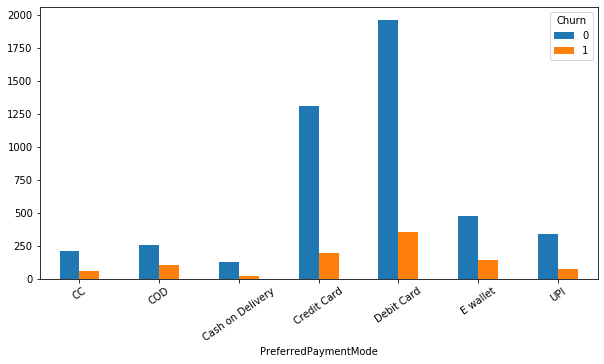

In [26]:
# insignt PreferredPaymentMode
## อัตราส่วนการ Churn ของ COD สูงกว่าเล็กน้อย -> เข้ามาเพื่อซื้อสินค้าที่ต้องการ ซื้อไม่บ่อย ก็ไม่อยากกรอกข้อมูลในการจ่ายผ่านช่องทางต่างๆ
## อัตราส่วนการ Churn ของ Credit Card ต่ำกว่า -> หลังจากเชื่อม creditscard แล้ว เป็นวิธีที่สะดวกที่สุดในการซื้อสินค้าออนไลน์ + คนที่มีใช้ Credit มักจะเป็นคนที่มี ฐาานะการเงินมั่นคง
# Action
## ทำให้ลูกค้าเชื่อมต่อ การจ่ายเงินผ่านช่องทางต่างๆได้ เช่น ให้กับการจ่ายเงินผ่าช่องทางต่างๆ
## หรือ ออกโปรโมชั่นให้กับสินค้าที่มีราคาสูง เช่น labtop ทำให้ต้องผ่อนผ่านบัตรเครดิต -> ซื้อสินค้าสะดวกขึ้น -> อาจจะทำให้ ซื้อสินค้าบ่อยขึ้น ลด Churn

temp_df = df.groupby(['PreferredPaymentMode','Churn']).size().unstack()
temp_df.plot(kind='bar',figsize=(10,5),rot=35)

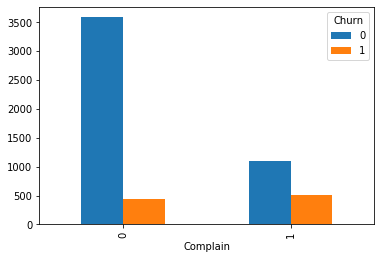

In [27]:
# ชัดเจนว่า complain มักจะ churn ถ้ามีการ complain เกิดขึ้น ต้องรีบเข้า support และปรับปรุงสิ่งที่เขา complain
df.groupby(['Complain','Churn']).size().unstack().plot(kind='bar')

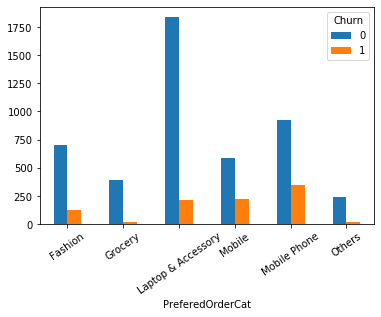

In [28]:
# insignt PreferredOrderCat
## ซื้อโทรศัพ Churn สูง -> มีจุดประสงค์แค่มาซื้อโทรศัพท์ แล้วก็เลิกใช้แอป / หรือ การเปลี่ยนโทรศัพท์ใหม่ เป็น customer id ใหม่ ??
df.groupby(['PreferedOrderCat','Churn']).size().unstack().plot(kind='bar',rot=35)

In [29]:
# test_df['% of Churn'].plot(kind='bar',grid=True,color='skyblue')

# insignt SatisfactionScore
# 5 คือ พึงพอใจมาก 1 คือ พึงพอใจน้อย ??


In [30]:
# LastDate ของอะไร ?? ถ้าเป็นการเข้าใช้ app 

In [31]:
# print(df['LastDate'].min())
# print(df['LastDate'].max())

In [32]:
# df['LastDate'][1].month

In [33]:
# def get_month(date):
#     return date.month
# df['LastMonth'] = df['LastDate'].apply(get_month)

In [34]:
# df.groupby(["LastMonth", "DaySinceLastOrder"]).size().unstack()
# df.groupby(["LastMonth", "Churn"]).size().unstack()

In [35]:
df.drop('LastDate',axis=1,inplace=True)

## Modeling Churn Prediction

## Handle Outlier (Numeric)

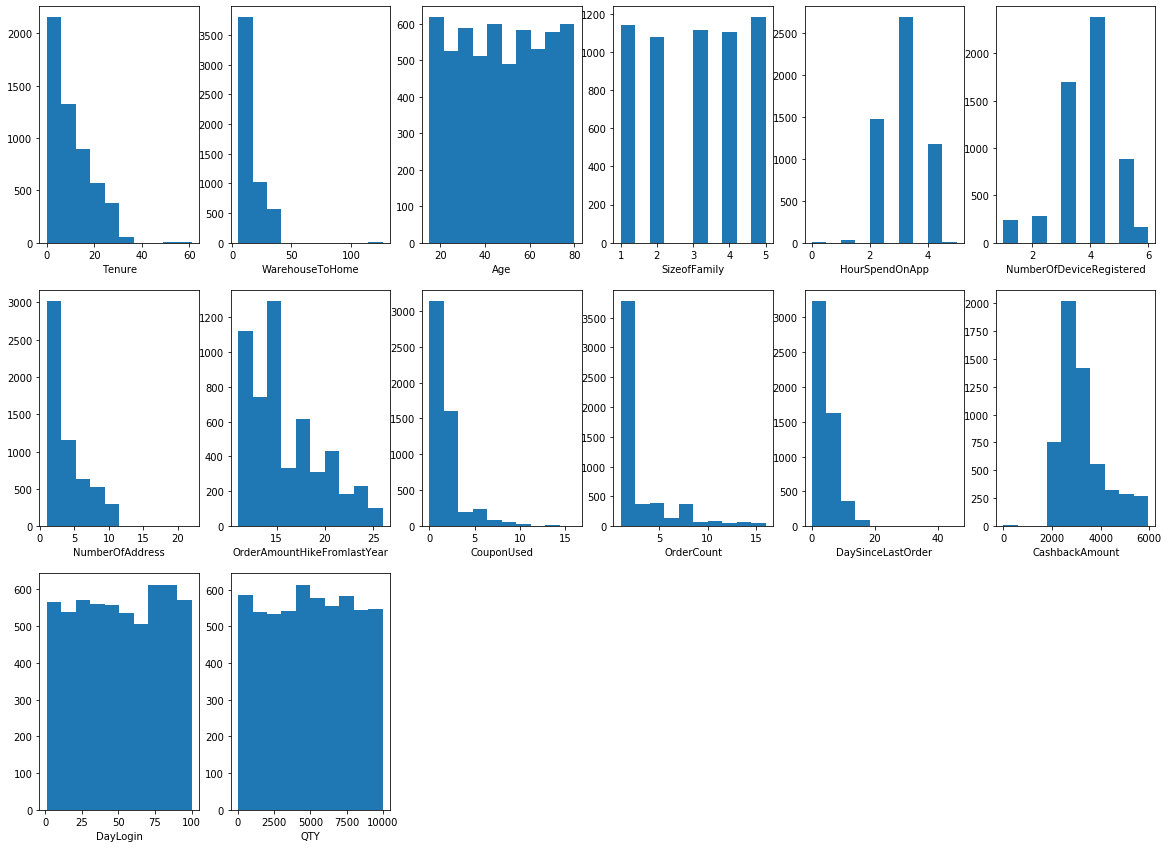

In [36]:
plt.figure(figsize=(20, 20))
for i in range(len(df[numeric].columns)):
    plt.subplot(4,6,i+1)
    plt.hist(df[df[numeric].columns[i]])
    plt.xlabel(str(df[numeric].columns[i]))

# df[df['HourSpendOnApp']==0]

In [37]:
## กรณีที่เป็นค่าที่ถูกต้องแต่เป็น extream value 
# การมี outlier (extream value) อาจจะส่งผลต่อ model บางตัวที่ sensitive ต่อ extream value
# การดรอป outlier ออกหมดก็อาจจะทำให้ miss information ในส่วนนั้น (model อาจจะไม่สมจริง เพราะในความจริงอาจจะต้องเจอค่าบางค่าที่มัน extream อยู่แล้ว)
# เป็น trade off

# บาง model outlier อาจจะไม่ส่งผลมากนัก

## Box-plot - ปรกติจะมี assumption ในส่วนของ normal distribution
# ใช้ 1.5 IQR ไม่ได้ - เพราะส่วนใหญ่ skew 
# ใช้เกณฑ์เบื้องต้นเป็น 3*IQR และพิจารณาทีละตัวแปร
# 3*IQR ก็ยังเยอะไป ประมาน 10% พิจารณาทีละตัวแปร - OrderCount, CouponUsed ดูไม่ได้เป็น extream value --keep or treat as category

# drop แค่ 11 ตัว เพราะ จำนวนน้อย และมีลักษณะเหมือน outlier จริงๆมากกว่า

### ถ้ามีเวลา treat OrderCount, CouponUsed  as category เอาค่าตั้งแต่ .. ขึ้นไปเป็น bin นึง เปรียบเทียบ Acc 

In [38]:
numeric

['Tenure',
 'WarehouseToHome',
 'Age',
 'SizeofFamily',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'DayLogin',
 'QTY']

In [39]:
# not_skew = ['HourSpendOnApp','NumberOfDeviceRegistered','CashbackAmount']
# skew_r = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
#          'DaySinceLastOrder']

In [40]:
for i in numeric:
    Q1 = df[i].quantile(0.25)
#     Q2 = df[i].quantile(0.50)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    
    
    df_outlier = df[(df[i] > Q3+3*IQR)|(df[i] < Q1-3*IQR)]
    out_fence = len(df_outlier)
#     out_siqr_fence = len(df[(df[i] > Q3+3*(Q3-Q2))|(df[i] < Q1-3*(Q2-Q1))])
#     out_siqr_fence = len(df[(df[i] > Q3+3*(Q3-Q2))])
    
    if out_fence > 0:
        print(i)
        print(out_fence)
#     print(len(df[(df[i] >= Q1+3*IQR)|(df[i] <= Q1-3*IQR)]))

Tenure
2
WarehouseToHome
2
NumberOfAddress
4
CouponUsed
303
OrderCount
263
DaySinceLastOrder
3


In [41]:
ol_list = ['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder','CouponUsed','OrderCount']

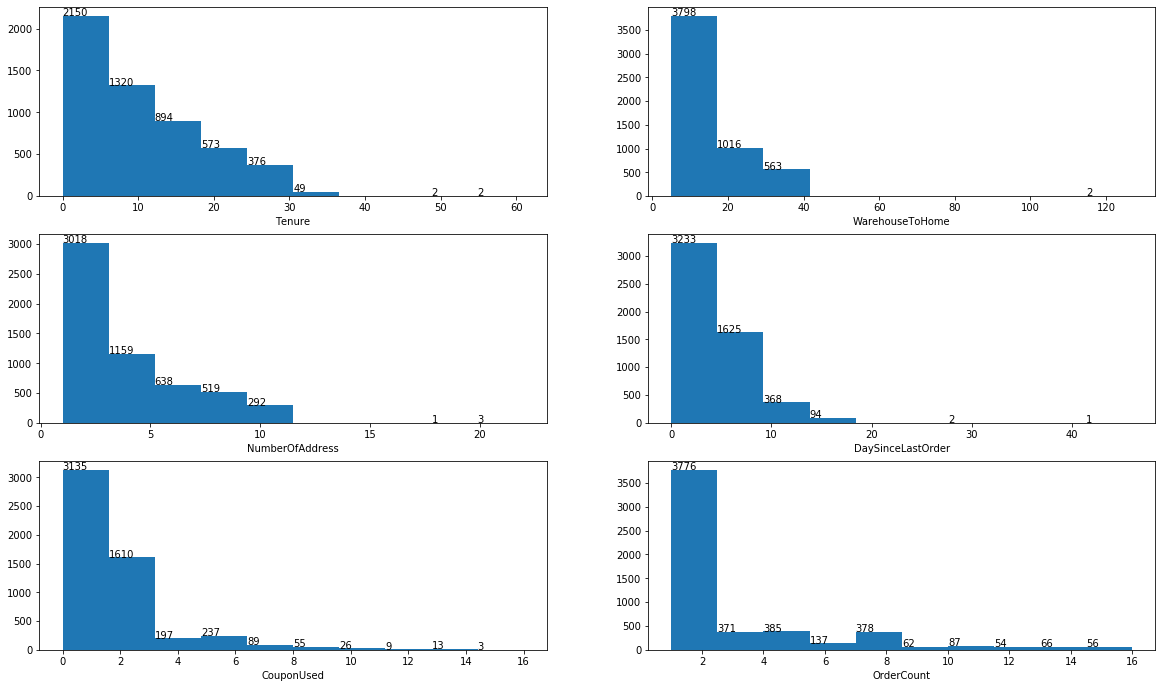

In [42]:
# plt.figure(figsize=(20, 20))
# for i in range(len(df.columns.drop('LastDate'))):
#     plt.subplot(4,6,i+1)
#     plt.hist(df[df.columns.drop('LastDate')[i]])
#     plt.xlabel(str(df.columns.drop('LastDate')[i]))
    
# plt.show()

# plt.figure(figsize=(20, 20))
# for i in range(len(df[numeric].columns)):
#     plt.subplot(4,6,i+1)
#     plt.hist(df[df[numeric].columns[i]])
#     plt.xlabel(str(df[numeric].columns[i]))

plt.figure(figsize=(20, 16))
for idx,i in enumerate(ol_list):
    plt.subplot(4,2,idx+1)
    density, bins, _ = plt.hist(df[i])
    count, _ = np.histogram(df[i], bins)
    plt.xlabel(i)
    for x,y,num in zip(bins, density, count):
        if num != 0:
            plt.text(x, y+0.01, num, fontsize=10)

# a,b,c = plt.hist(df['NumberOfAddress'],bins=10)
# a
# b


In [43]:
ol_list

['Tenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CouponUsed',
 'OrderCount']

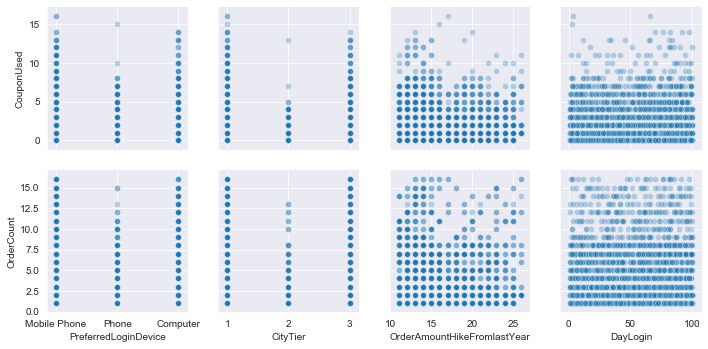

In [44]:
## แคป แค่บาง plot ไปเป็นตัวอย่าง ว่าลักษณะประมาณนี้อาจจะมองเป็น outlier ได้

import warnings
warnings.simplefilter(action='ignore')
sns.set_style('darkgrid')
sns.pairplot(x_vars =  ['PreferredLoginDevice','CityTier','OrderAmountHikeFromlastYear','DayLogin'],
             y_vars = ['CouponUsed','OrderCount'], data = df ,plot_kws={'alpha': 0.3})
plt.show()
# ['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder','CouponUsed','OrderCount']
# df.drop(ol_list,axis=1).columns
# ['PreferredLoginDevice','CityTier','OrderAmountHikeFromlastYear','DayLogin']

In [45]:
## Drop
df.drop(df[df['Tenure']>45].index,inplace=True)
df.drop(df[df['WarehouseToHome']>100].index,inplace=True)
df.drop(df[df['NumberOfAddress']>15].index,inplace=True)
df.drop(df[df['DaySinceLastOrder']>25].index,inplace=True)

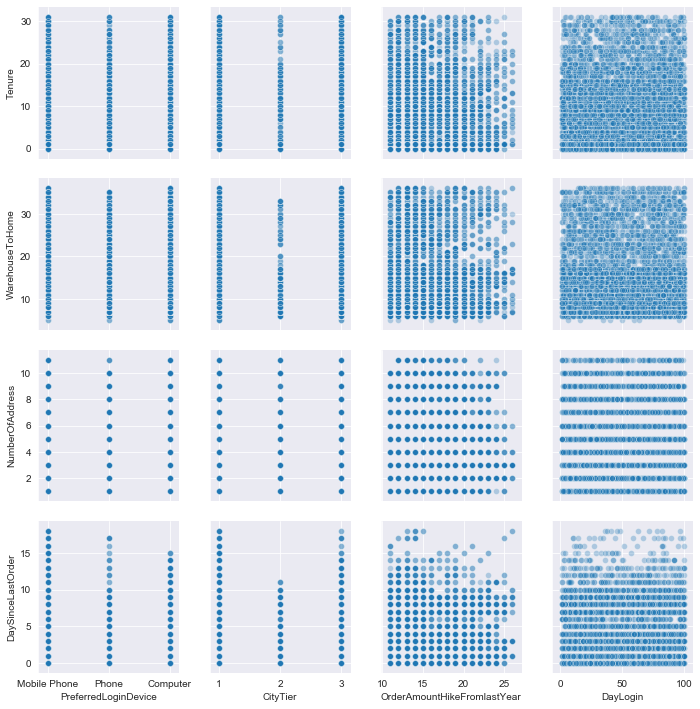

In [46]:
import warnings
warnings.simplefilter(action='ignore')
sns.set_style('darkgrid')
sns.pairplot(x_vars =  ['PreferredLoginDevice','CityTier','OrderAmountHikeFromlastYear','DayLogin'],
             y_vars = ['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder'], data = df ,plot_kws={'alpha': 0.3})
plt.show()
# ['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder','CouponUsed','OrderCount']
# df.drop(ol_list,axis=1).columns
# ['PreferredLoginDevice','CityTier','OrderAmountHikeFromlastYear','DayLogin']

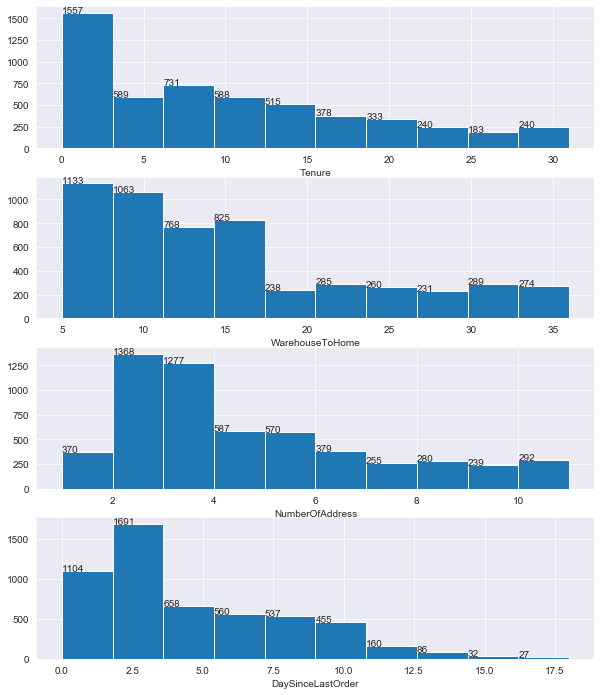

In [47]:
plt.figure(figsize=(10, 12))
for idx,i in enumerate(['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder']):
    plt.subplot(4,1,idx+1)
    density, bins, _ = plt.hist(df[i])
    count, _ = np.histogram(df[i], bins)
    plt.xlabel(i)
    for x,y,num in zip(bins, density, count):
        if num != 0:
            plt.text(x, y+0.01, num, fontsize=10)

In [48]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5354.0,10.155585,8.467269,0.0,2.00,9.000000,16.000000,31.00
WarehouseToHome,5366.0,15.602870,8.262072,5.0,9.00,14.000000,20.000000,36.00
Age,5615.0,47.299555,19.177095,15.0,30.50,47.000000,64.000000,80.00
SizeofFamily,5617.0,3.018337,1.428564,1.0,2.00,3.000000,4.000000,5.00
HourSpendOnApp,5362.0,2.931555,0.721907,0.0,2.00,3.000000,3.000000,5.00
NumberOfDeviceRegistered,5617.0,3.690048,1.024050,1.0,3.00,4.000000,4.000000,6.00
NumberOfAddress,5617.0,4.202065,2.548380,1.0,2.00,3.000000,6.000000,11.00
OrderAmountHikeFromlastYear,5353.0,15.703718,3.671694,11.0,13.00,15.000000,18.000000,26.00
CouponUsed,5362.0,1.751399,1.895892,0.0,1.00,1.000000,2.000000,16.00
OrderCount,5359.0,3.009143,2.940512,1.0,1.00,2.000000,3.000000,16.00


In [49]:
# sns.kdeplot(df1['Tenure'],label='G3 Math',)
# sns.kdeplot(df1['WarehouseToHome'],label='G3 Math',)
# sns.kdeplot(df1['HourSpendOnApp'],label='G3 Math',)
# sns.kdeplot(df1['OrderAmountHikeFromlastYear'],label='G3 Math',)
# plt.figure(figsize=(10,10))
# sns.boxplot(data=df['Tenure'],whis=1.5)
# df.boxplot(column=['CashbackAmount'])

In [50]:
# outlier before missing

## Handle Missing

In [51]:
print('Number of Observation')
print('Before drop missing values:',df.shape[0])
print('After drop missing values:',df.dropna().shape[0]) 
# Drop na is not a good idea (5630 to 3773) to much loss information >5%
# all missing value are numeric data

Number of Observation
Before drop missing values: 5617
After drop missing values: 3761


In [52]:
print('-- Missing Values --')
print(df.isnull().sum()[df.isnull().sum()>0])

-- Missing Values --
Tenure                         263
WarehouseToHome                251
Age                              2
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    264
CouponUsed                     255
OrderCount                     258
DaySinceLastOrder              307
QTY                              3
dtype: int64


In [53]:
# variable contian missing value (exclude Age,QTY)
missing_list = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear',
                'CouponUsed','OrderCount','DaySinceLastOrder']

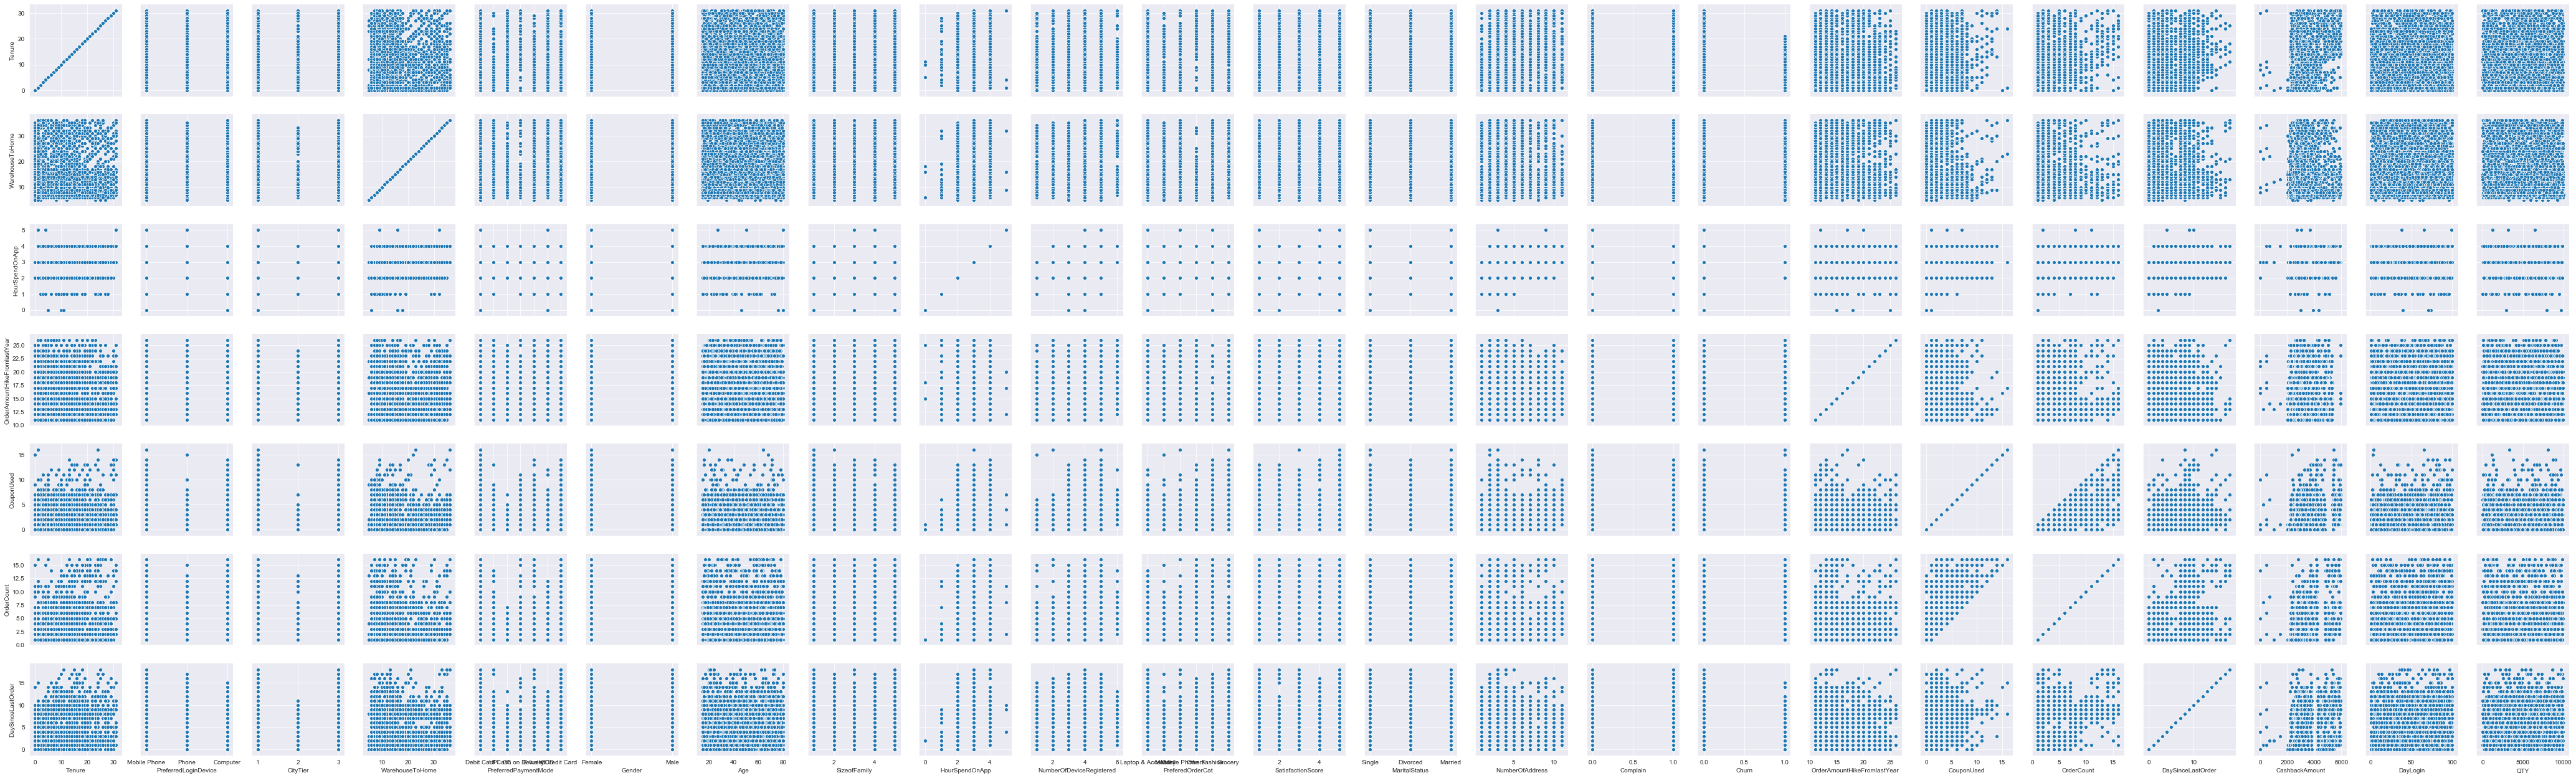

In [54]:
# plot scatter value contain missing vs all other value
# looking for relation that might be useful for imputing missing value

import warnings
warnings.simplefilter(action='ignore')
sns.set_style('darkgrid')
sns.pairplot(x_vars =  df.columns,
             y_vars = missing_list, data = df)
plt.show()

Text(0, 0.5, 'CouponUsed')

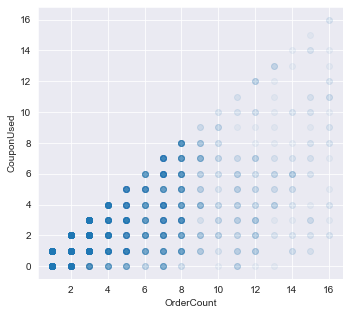

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(df['OrderCount'],df['CouponUsed'],alpha=0.05)
plt.xlabel('OrderCount')
plt.ylabel('CouponUsed')


In [56]:
## จะ impute ด้วย median เนื่องจาก ที่สังเกตก่อนหน้าว่า ค่อนข้างมีความ skew, mean จะ impact กับค่าเหล่านั้นซึ่งอาจจะไม่เหมาะ
## แต่ในส่วนของ couponused กับ ordercount ที่มีความสัมพันธ์กัน 

In [57]:
# df = pd.DataFrame(
#     np.array([[1, 2, 3], [4, 5, np.nan], [7, 8, 9], [3, 7, np.nan], [5, 6, np.nan]]), 
#     columns=['a', 'b', 'c']
# )
# df['c'] = df.apply(
#     lambda row: (df[df['b']<=row['b']]['c'].median()) if np.isnan(row['c']) else row['c'],
#     axis=1
# )

In [58]:
df[df['CouponUsed'].isnull()][['CouponUsed','OrderCount']].head()

,CouponUsed,OrderCount
61,NaN,9.0
62,NaN,2.0
69,NaN,11.0
112,NaN,15.0
138,NaN,7.0


In [59]:
# Impute Coupon Used 

df['CouponUsed'] = df.apply(
    lambda row: (df[df['CouponUsed']<=row['OrderCount']]['CouponUsed'].median()) if np.isnan(row['CouponUsed']) else row['CouponUsed'],
    axis=1
)

In [60]:
# Impute Order Count

df['OrderCount'] = df.apply(
    lambda row: (df[df['OrderCount']>=row['CouponUsed']]['OrderCount'].median()) if np.isnan(row['OrderCount']) else row['OrderCount'],
    axis=1
)

Text(0, 0.5, 'CouponUsed')

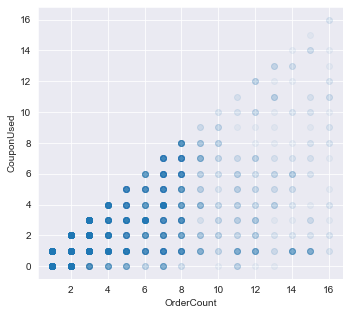

In [61]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(df['OrderCount'],df['CouponUsed'],alpha=0.05)
plt.xlabel('OrderCount')
plt.ylabel('CouponUsed')

# plt.subplot(1,2,2)
# plt.scatter(df['CouponUsed'],df['OrderCount'],alpha=0.05)
# plt.xlabel('CouponUsed')
# plt.ylabel('OrderCount')

In [62]:
## order >= coupon ถ้าลูกค้ามี order 3 ครั้ง ก็ไม่ makesense ที่จะใช้ coupon ไปเกิน 3 ครั้ง
# จึงใช้ข้อจำกัดี้ในการ impute missing value
# ถ้า coupon เปนค่า missing แลละ order 3ครั้ง จะ impute ด้วย median ของ coupon ที่ <=3

In [63]:
fillna_list = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear',
               'DaySinceLastOrder','Age','QTY']
for i in fillna_list:
    df[i]=df[i].fillna(df[i].median())

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617 entries, 0 to 5629
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5617 non-null   float64
 1   PreferredLoginDevice         5617 non-null   object 
 2   CityTier                     5617 non-null   int64  
 3   WarehouseToHome              5617 non-null   float64
 4   PreferredPaymentMode         5617 non-null   object 
 5   Gender                       5617 non-null   object 
 6   Age                          5617 non-null   float64
 7   SizeofFamily                 5617 non-null   int64  
 8   HourSpendOnApp               5617 non-null   float64
 9   NumberOfDeviceRegistered     5617 non-null   int64  
 10  PreferedOrderCat             5617 non-null   object 
 11  SatisfactionScore            5617 non-null   int64  
 12  MaritalStatus                5617 non-null   object 
 13  NumberOfAddress   

------------------------------------

-----------------------

In [65]:
# return prob. estimate not just 0,1 - both tree, logistic

In [66]:
# def labelEncode(dataframe,columns):
    
#     '''
#     This function is for labeling nominal data. The function takes two arguments which are dataframe and nominal columns. 
#     It returns:
#     1) dataframe with labeled columns_ ,
#     2) lb_object which would be used later during after prediction process, and 
#     3) classes of those columns that are labeled
#     '''
    
#     from sklearn.preprocessing import LabelEncoder
#     classes = dict()
#     lb_object = dict()
#     for column in columns:
#         lb = LabelEncoder()
#         after_lb = lb.fit_transform(dataframe[column])
#         classes[column] = lb.classes_
#         dataframe[column+'_lb'] = after_lb
#         lb_object[column] = lb
#     return dataframe, lb_object, classes

# def standardScaler(dataframe,columns):
#     '''
#     This function is for z-standard normalization. This function takes two arguments which are dataframe and numeric columns.
#     It returns:
#     1) dataframe with standardized columns, 
#     2) mean of data in such columns as dictionary datatype, 
#     3) standard deviation of data in such columns as dictionary datatype and
#     4) stantdard scaler object. This will be used later using prediction new data for converting data to be the same distribution as training data
#     '''
    
#     from sklearn.preprocessing import StandardScaler
#     mean = dict()
#     sd = dict()
#     scaler = StandardScaler()
#     scaler.fit(df[columns])
#     for index,column in enumerate(columns):
#         mean[column] = scaler.mean_[index]
#         sd[column] = np.sqrt(scaler.var_)[index]
#     dataframe[columns] = scaler.transform(dataframe[columns])    
#     return dataframe, scaler, mean, sd, 

In [67]:
# add last month to ordinal
# norminal = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']
# ordinal = ['CityTier','SatisfactionScore']
# numeric = ['Tenure','WarehouseToHome','Age','SizeofFamily','HourSpendOnApp',
#            'NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear',
#            'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount','DayLogin','QTY']
# datetime = ['LastDate']
# target = ['Churn']

# df_model = df.copy()

# from sklearn.preprocessing import StandardScaler
# sd_scale = StandardScaler()
# df_model[numeric] = sd_scale.fit_transform(df_model[numeric])

# # get_dummies
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# StandardScaler for numeric data
# df_model, scaler, mean, sd = standardScaler(df_model,numeric) 

In [68]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline,make_pipeline
from imblearn.over_sampling import SMOTE

In [69]:
norminal = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']
ordinal = ['CityTier','SatisfactionScore']
numeric = ['Tenure','WarehouseToHome','Age','SizeofFamily','HourSpendOnApp',
           'NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear',
           'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount','DayLogin','QTY']
datetime = ['LastDate']
target = ['Churn']

In [70]:
from sklearn import set_config
set_config(display='diagram')
# pipeline

In [71]:
# df_model = df.copy()
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# X = df_model.drop(['Churn'],axis=1)
# y = df_model['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

# std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
#                               remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)

# logis = LogisticRegression(random_state=1)
# logis.fit(X_train, y_train)

# y_pred_train = logis.predict(X_train)
# print(classification_report(y_train,y_pred_train))

# y_pred_test = logis.predict(X_test)
# print(classification_report(y_test,y_pred_test))

In [72]:
# df_model = df.copy()
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# X = df_model.drop(['Churn'],axis=1)
# y = df_model['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=1)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
#                               remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)

# logis = LogisticRegression(random_state=1)
# logis.fit(X_train, y_train)

# y_pred_train = logis.predict(X_train)
# print(classification_report(y_train,y_pred_train))

# y_pred_test = logis.predict(X_test)
# print(classification_report(y_test,y_pred_test))

## Logistic Regression Grid

In [73]:
## ต้องเอา smote ใส่ pipeline เพราะ gridsearchCV เราจะ oversampling แค่ train ไม่ oversampling validate
## ต้องเอา scaling ใส่ pipeline ด้วยเพราะต้อง oversampling ก่อน scaling

# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# getdummie -> smote -> std scale เฉพาะ numeric -> model 
# //เอา onehotencode(getdummie) ไปไว้ใน transform หลัง SMOTE ไม่ได้ งง แต่ทำ onehotencode ตั้งแต่แรกได้ก็ไม่มีปัญหาเหมือน scaling

df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

pipeline = imbpipeline(steps = [['scale numeric',std_num],
                                ['classifier', LogisticRegression(random_state=1,max_iter=1000)]])

param_grid = {'classifier__C':[0.1, 0.5, 1, 10, 50, 100],
             'classifier__penalty':['l1', 'l2']}

grid_logis = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=4)

grid_logis.fit(X_train, y_train)


cv_score = grid_logis.best_score_
test_score = grid_logis.score(X_test, y_test)
print(f'Cross-validation score(f1): {cv_score}\nTest score(f1): {test_score}')
print(' ')

# print('------------- train --------------')
# y_pred_train = grid_search_logis.best_estimator_.predict(X_train)
# print(classification_report(y_train, y_pred_train))

# print('------------- test ---------------')
# y_pred_test = grid_search_logis.best_estimator_.predict(X_test)
# print(classification_report(y_test, y_pred_test))

Cross-validation score(f1): 0.6278459289529035
Test score(f1): 0.6
 


## Logistic Regression Grid with Oversampling

In [74]:
## ต้องเอา smote ใส่ pipeline เพราะ gridsearchCV เราจะ oversampling แค่ train ไม่ oversampling validate
## ต้องเอา scaling ใส่ pipeline ด้วยเพราะต้อง oversampling ก่อน scaling

# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# getdummie -> smote -> std scale เฉพาะ numeric -> model 
# //เอา onehotencode(getdummie) ไปไว้ใน transform หลัง SMOTE ไม่ได้ งง แต่ทำ onehotencode ตั้งแต่แรกได้ก็ไม่มีปัญหาเหมือน scaling

df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['scale numeric',std_num],
                                ['classifier', LogisticRegression(random_state=1,max_iter=1000)]])

param_grid = {'classifier__C':[0.1, 0.5, 1, 10, 50, 100],
             'classifier__penalty':['l1', 'l2']}

grid_logis_smote = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=4)

grid_logis_smote.fit(X_train, y_train)


cv_score = grid_logis_smote.best_score_
test_score = grid_logis_smote.score(X_test, y_test)
print(f'Cross-validation score(f1): {cv_score}\nTest score(f1): {test_score}')
print(' ')

print('------------- train --------------')
y_pred_train = grid_logis_smote.best_estimator_.predict(X_train)
print(classification_report(y_train, y_pred_train))

print('------------- test ---------------')
y_pred_test = grid_logis_smote.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_test))

Cross-validation score(f1): 0.6292745597951528
Test score(f1): 0.6172106824925817
 
------------- train --------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3744
           1       0.77      0.56      0.65       749

    accuracy                           0.90      4493
   macro avg       0.85      0.76      0.80      4493
weighted avg       0.89      0.90      0.89      4493

------------- test ---------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       928
           1       0.74      0.53      0.62       196

    accuracy                           0.89      1124
   macro avg       0.82      0.75      0.77      1124
weighted avg       0.88      0.89      0.88      1124



##  Logistic selected model

In [75]:
pd.DataFrame(grid_logis_smote.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False).head()

,params,mean_test_score
3,"{'classifier__C': 0.5, 'classifier__penalty': 'l2'}",0.629275
5,"{'classifier__C': 1, 'classifier__penalty': 'l2'}",0.626654
9,"{'classifier__C': 50, 'classifier__penalty': 'l2'}",0.626584
11,"{'classifier__C': 100, 'classifier__penalty': 'l2'}",0.626584
7,"{'classifier__C': 10, 'classifier__penalty': 'l2'}",0.625764


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3744
           1       0.97      0.91      0.94      3744

    accuracy                           0.94      7488
   macro avg       0.94      0.94      0.94      7488
weighted avg       0.94      0.94      0.94      7488

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       928
           1       0.62      0.63      0.63       196

    accuracy                           0.87      1124
   macro avg       0.77      0.78      0.77      1124
weighted avg       0.87      0.87      0.87      1124



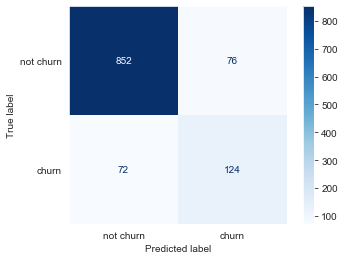

In [76]:
df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

X_train = std_num.fit_transform(X_train)
X_test = std_num.fit_transform(X_test)

logis = LogisticRegression(C=0.5,
                           penalty='l2',
                           random_state=1)
logis.fit(X_train, y_train)

y_pred_train = logis.predict(X_train)
print(classification_report(y_train,y_pred_train))

y_pred_test = logis.predict(X_test)
print(classification_report(y_test,y_pred_test))

plot_confusion_matrix(logis,X_test,y_test,display_labels=['not churn','churn'],cmap=plt.cm.Blues)
plt.grid(False)

In [77]:
logis.predict_proba(X_test)

array([[0.97880808, 0.02119192],
       [0.91483252, 0.08516748],
       [0.96827584, 0.03172416],
       ...,
       [0.90996103, 0.09003897],
       [0.96740936, 0.03259064],
       [0.77588954, 0.22411046]])

In [78]:
######################## Decision Tree ##########################

In [79]:
# df_model = df.copy()
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# X = df_model.drop(['Churn'],axis=1)
# y = df_model['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

# std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
#                               remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)


# # -------------- Algorithm ---------------
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# y_pred_train = dt.predict(X_train)
# print(classification_report(y_train,y_pred_train))

# y_pred_test = dt.predict(X_test)
# print(classification_report(y_test,y_pred_test))

In [80]:
# df_model = df.copy()
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# X = df_model.drop(['Churn'],axis=1)
# y = df_model['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=1)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
#                               remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)

# # -------------- Algorithm ---------------
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# y_pred_train = dt.predict(X_train)
# print(classification_report(y_train,y_pred_train))

# y_pred_test = dt.predict(X_test)
# print(classification_report(y_test,y_pred_test))

## Decision Tree grid

In [81]:
## ต้องเอา smote ใส่ pipeline เพราะ gridsearchCV เราจะ oversampling แค่ train ไม่ oversampling validate
## ต้องเอา scaling ใส่ pipeline ด้วยเพราะต้อง oversampling ก่อน scaling

# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# getdummie -> smote -> std scale เฉพาะ numeric -> model 
# //เอา onehotencode(getdummie) ไปไว้ใน transform หลัง SMOTE ไม่ได้ งง แต่ทำ onehotencode ตั้งแต่แรกได้ก็ไม่มีปัญหาเหมือน scaling

df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

pipeline = Pipeline(steps = [['scale numeric',std_num],
                                ['classifier', DecisionTreeClassifier()]])

param_grid = {'classifier__ccp_alpha':[0.1, .01, .001, 0],
             'classifier__criterion':['gini', 'entropy']}

grid_dt = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=4)

grid_dt.fit(X_train, y_train)


cv_score = grid_dt.best_score_
test_score = grid_dt.score(X_test, y_test)
print(f'Cross-validation score(f1): {cv_score}\nTest score(f1): {test_score}')
print(' ')

# print('------------- train --------------')
# y_pred_train = grid_dt.best_estimator_.predict(X_train)
# print(classification_report(y_train, y_pred_train))

# print('------------- test ---------------')
# y_pred_test = grid_dt.best_estimator_.predict(X_test)
# print(classification_report(y_test, y_pred_test))

Cross-validation score(f1): 0.7467465861854534
Test score(f1): 0.7475247524752474
 


## Decision Tree Grid with Oversampling

In [82]:
## ต้องเอา smote ใส่ pipeline เพราะ gridsearchCV เราจะ oversampling แค่ train ไม่ oversampling validate
## ต้องเอา scaling ใส่ pipeline ด้วยเพราะต้อง oversampling ก่อน scaling

# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# getdummie -> smote -> std scale เฉพาะ numeric -> model 
# //เอา onehotencode(getdummie) ไปไว้ใน transform หลัง SMOTE ไม่ได้ งง แต่ทำ onehotencode ตั้งแต่แรกได้ก็ไม่มีปัญหาเหมือน scaling

df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=1)],
                             ['scale numeric',std_num],
                             ['classifier', DecisionTreeClassifier()]])

param_grid = {'classifier__ccp_alpha':[0.1, .01, .001, 0],
             'classifier__criterion':['gini', 'entropy']}

grid_dt_SMOTE = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=4)

grid_dt_SMOTE.fit(X_train, y_train)

cv_score = grid_dt_SMOTE.best_score_
test_score = grid_dt_SMOTE.score(X_test, y_test)
print(f'Cross-validation score(f1): {cv_score}\nTest score(f1): {test_score}')
print(' ')

# print('------------- train --------------')
# y_pred_train = grid_dt_SMOTE.best_estimator_.predict(X_train)
# print(classification_report(y_train, y_pred_train))

# print('------------- test ---------------')
# y_pred_test = grid_dt_SMOTE.best_estimator_.predict(X_test)
# print(classification_report(y_test, y_pred_test))

Cross-validation score(f1): 0.8696243331984036
Test score(f1): 0.6847290640394089
 


## Decision Tree selected model

In [83]:
pd.DataFrame(grid_dt.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False).head()

,params,mean_test_score
7,"{'classifier__ccp_alpha': 0, 'classifier__criterion': 'entropy'}",0.746747
6,"{'classifier__ccp_alpha': 0, 'classifier__criterion': 'gini'}",0.737290
5,"{'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'entropy'}",0.735346
4,"{'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'gini'}",0.693247
1,"{'classifier__ccp_alpha': 0.1, 'classifier__criterion': 'entropy'}",0.577673


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3744
           1       1.00      1.00      1.00       749

    accuracy                           1.00      4493
   macro avg       1.00      1.00      1.00      4493
weighted avg       1.00      1.00      1.00      4493

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       928
           1       0.73      0.76      0.74       196

    accuracy                           0.91      1124
   macro avg       0.84      0.85      0.84      1124
weighted avg       0.91      0.91      0.91      1124



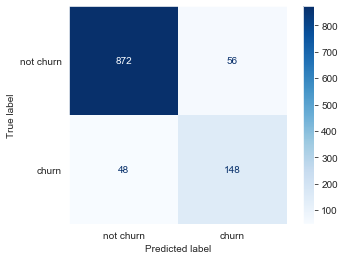

In [84]:
df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

X_train = std_num.fit_transform(X_train)
X_test = std_num.fit_transform(X_test)


# -------------- Algorithm ---------------
dt = DecisionTreeClassifier(ccp_alpha=0,
                           criterion='entropy')
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
print(classification_report(y_train,y_pred_train))

y_pred_test = dt.predict(X_test)
print(classification_report(y_test,y_pred_test))

plot_confusion_matrix(dt,X_test,y_test,display_labels=['not churn','churn'],cmap=plt.cm.Blues)
plt.grid(False)

In [85]:
##################################################################

In [86]:
######################### Random Forest ########################

In [87]:
# df_model = df.copy()
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# X = df_model.drop(['Churn'],axis=1)
# y = df_model['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

# std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
#                               remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)


# # -------------- Algorithm ---------------
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# y_pred_train = rf.predict(X_train)
# print(classification_report(y_train,y_pred_train))

# y_pred_test = rf.predict(X_test)
# print(classification_report(y_test,y_pred_test))

In [88]:
# df_model = df.copy()
# df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

# X = df_model.drop(['Churn'],axis=1)
# y = df_model['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=1)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
#                               remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# y_pred_train = rf.predict(X_train)
# print(classification_report(y_train,y_pred_train))

# y_pred_test = rf.predict(X_test)
# print(classification_report(y_test,y_pred_test))

## OCT

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3744
           1       0.69      0.51      0.59       749

    accuracy                           0.88      4493
   macro avg       0.80      0.73      0.76      4493
weighted avg       0.87      0.88      0.87      4493

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       928
           1       0.72      0.49      0.59       196

    accuracy                           0.88      1124
   macro avg       0.81      0.73      0.76      1124
weighted avg       0.87      0.88      0.87      1124



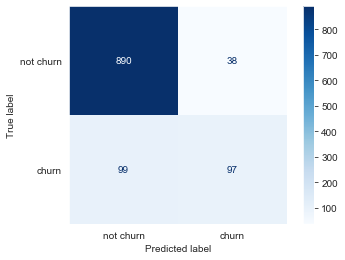

In [107]:
df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

X_train = std_num.fit_transform(X_train)
X_test = std_num.fit_transform(X_test)


# -------------- Algorithm ---------------
dt = DecisionTreeClassifier(ccp_alpha=0,
                           criterion='gini',
                           max_depth=3)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
print(classification_report(y_train,y_pred_train))

y_pred_test = dt.predict(X_test)
print(classification_report(y_test,y_pred_test))

plot_confusion_matrix(dt,X_test,y_test,display_labels=['not churn','churn'],cmap=plt.cm.Blues)
plt.grid(False)

In [108]:
dt.get_depth()

3

In [106]:
from interpretableai import iai

oct_1 = iai.OptimalTreeClassifier(ls_num_tree_restarts=1000,criterion='gini',max_depth=3,cp=0)
oct_1.fit(X_train, y_train)

Fitted OptimalTreeClassifier:
  1) Split: x36 < 0.5
    2) Split: x1 < -1.043
      3) Split: x7 < -0.2775
        4) Predict: 1 (66.27%), [86,169], 255 points, error 0.447
        5) Predict: 1 (93.88%), [6,92], 98 points, error 0.115
      6) Split: x12 < -1.07
        7) Predict: 1 (58.44%), [32,45], 77 points, error 0.4857
        8) Predict: 0 (88.31%), [740,98], 838 points, error 0.2065
    9) Split: x1 < -1.043
      10) Split: x7 < 0.5063
        11) Predict: 0 (67.86%), [321,152], 473 points, error 0.4362
        12) Predict: 1 (63.33%), [44,76], 120 points, error 0.4644
      13) Split: x12 < -1.158
        14) Predict: 0 (63.46%), [33,19], 52 points, error 0.4638
        15) Predict: 0 (96.20%), [2482,98], 2580 points, error 0.07308

In [109]:
y_pred_train = oct_1.predict(X_train)
print(classification_report(y_train,y_pred_train))

y_pred_test = oct_1.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3744
           1       0.69      0.51      0.59       749

    accuracy                           0.88      4493
   macro avg       0.80      0.73      0.76      4493
weighted avg       0.87      0.88      0.87      4493

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       928
           1       0.71      0.51      0.60       196

    accuracy                           0.88      1124
   macro avg       0.81      0.73      0.76      1124
weighted avg       0.87      0.88      0.87      1124



## Random forest Grid

In [88]:
## ต้องเอา smote ใส่ pipeline เพราะ gridsearchCV เราจะ oversampling แค่ train ไม่ oversampling validate
## ต้องเอา scaling ใส่ pipeline ด้วยเพราะต้อง oversampling ก่อน scaling

# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# getdummie -> smote -> std scale เฉพาะ numeric -> model 
# //เอา onehotencode(getdummie) ไปไว้ใน transform หลัง SMOTE ไม่ได้ งง แต่ทำ onehotencode ตั้งแต่แรกได้ก็ไม่มีปัญหาเหมือน scaling

df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

pipeline = imbpipeline(steps = [['scale numeric',std_num],
                                ['classifier', RandomForestClassifier(random_state=1)]])

param_grid = {'classifier__n_estimators':[int(x) for x in np.linspace(start = 30, stop = 80, num = 10)],
             'classifier__max_features':['auto', 'sqrt'],
             'classifier__max_depth':[4,8,16,32],
             'classifier__min_samples_split':[2,5,10,50],
             'classifier__min_samples_leaf':[1,5,10,50],
             'classifier__bootstrap': [True, False]}

grid_rf = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=4)

grid_rf.fit(X_train, y_train)

cv_score = grid_rf.best_score_
test_score = grid_rf.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print(' ')

# print('------------- train --------------')
# y_pred_train = grid_search_rf.best_estimator_.predict(X_train)
# print(classification_report(y_train, y_pred_train))

# print('------------- test ---------------')
# y_pred_test = grid_rf.best_estimator_.predict(X_test)
# print(classification_report(y_test, y_pred_test))

Cross-validation score: 0.8415130928702709
Test score: 0.8705234159779615
 


## Random forest grid with Oversampling

In [89]:
## ต้องเอา smote ใส่ pipeline เพราะ gridsearchCV เราจะ oversampling แค่ train ไม่ oversampling validate
## ต้องเอา scaling ใส่ pipeline ด้วยเพราะต้อง oversampling ก่อน scaling

# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# getdummie -> smote -> std scale เฉพาะ numeric -> model 
# //เอา onehotencode(getdummie) ไปไว้ใน transform หลัง SMOTE ไม่ได้ งง แต่ทำ onehotencode ตั้งแต่แรกได้ก็ไม่มีปัญหาเหมือน scaling

df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['scale numeric',std_num],
                                ['classifier', RandomForestClassifier(random_state=1)]])

param_grid = {'classifier__n_estimators':[int(x) for x in np.linspace(start = 40, stop = 100, num = 10)],
             'classifier__max_features':['auto', 'sqrt'],
             'classifier__max_depth':[4,8,16,32],
             'classifier__min_samples_split':[2,5,10,50],
             'classifier__min_samples_leaf':[1,5,10,50],
             'classifier__bootstrap': [True, False]}

grid_rf_SMOTE = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=4)

grid_rf_SMOTE.fit(X_train, y_train)

cv_score = grid_rf_SMOTE.best_score_
test_score = grid_rf_SMOTE.score(X_test, y_test)
print(f'Cross-validation score(f1): {cv_score}\nTest score(f1): {test_score}')
print(' ')

# print('------------- train --------------')
# y_pred_train = grid_search_rf.best_estimator_.predict(X_train)
# print(classification_report(y_train, y_pred_train))

# print('------------- test ---------------')
# y_pred_test = grid_search_rf.best_estimator_.predict(X_test)
# print(classification_report(y_test, y_pred_test))

Cross-validation score(f1): 0.8917253960901913
Test score(f1): 0.7086614173228347
 


## Random forest Selected model

In [90]:
pd.DataFrame(grid_rf.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False).head()

,params,mean_test_score
2245,"{'classifier__bootstrap': False, 'classifier__max_depth': 32, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 57}",0.841513
2405,"{'classifier__bootstrap': False, 'classifier__max_depth': 32, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 57}",0.841513
2246,"{'classifier__bootstrap': False, 'classifier__max_depth': 32, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 63}",0.840960
2406,"{'classifier__bootstrap': False, 'classifier__max_depth': 32, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 63}",0.840960
2244,"{'classifier__bootstrap': False, 'classifier__max_depth': 32, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 52}",0.837634


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       928
           1       0.94      0.70      0.80       196

    accuracy                           0.94      1124
   macro avg       0.94      0.84      0.88      1124
weighted avg       0.94      0.94      0.94      1124



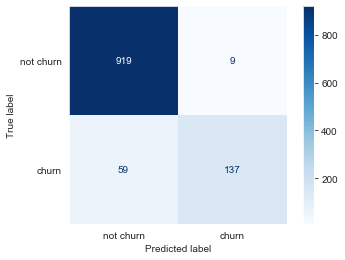

In [110]:
df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

# X_train = std_num.fit_transform(X_train)
# X_test = std_num.fit_transform(X_test)


# -------------- Algorithm ---------------
# for i in range(50):

pipe = Pipeline(steps = [['scale numeric',std_num],
                         ['classifier', RandomForestClassifier(bootstrap='False',
                                                                       n_estimators= 57,
                                                                       max_depth =  32,
                                                                       min_samples_split = 2, 
                                                                       min_samples_leaf = 1,
                                                                       random_state = 1)]])

test = pipe.fit(X_train, y_train)

#     y_pred_train = rf.predict(X_train)
#     print(classification_report(y_train,y_pred_train))

y_pred_test = pipe.predict(X_test)
print(classification_report(y_test,y_pred_test))
# print(i)
#     print(classification_report(y_test,y_pred_test)[138:142])
# print(confusion_matrix(y_test,y_pred_test))

plot_confusion_matrix(test,X_test,y_test,display_labels=['not churn','churn'],cmap=plt.cm.Blues)
plt.grid(False)

In [94]:
# low precision - ทำนายว่า chrun แต่เขาไม่ได้ churn - wasted money on retention target
# low recall - ค่าจริงเป็น chrun แต่ทำนายว่าไม่ churn - might lose customer

# both importance decide to use f-1 score as a metrics


In [109]:
df_model = df.copy()
df_model = pd.get_dummies(data=df_model, columns=norminal+ordinal)

X = df_model.drop(['Churn'],axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

std_num = ColumnTransformer(transformers=[("std", StandardScaler(), numeric)],
                              remainder='passthrough')

X_train = std_num.fit_transform(X_train)
X_test = std_num.fit_transform(X_test)


# -------------- Algorithm ---------------
# for i in range(50):
rf = RandomForestClassifier(bootstrap='False',
                               n_estimators= 57,
                               max_depth =  32,
                               min_samples_split = 2, 
                               min_samples_leaf = 1,
                               random_state = 1)
rf.fit(X_train, y_train)

#     y_pred_train = rf.predict(X_train)
#     print(classification_report(y_train,y_pred_train))

y_pred_test = rf.predict(X_test)
print(classification_report(y_test,y_pred_test))
# print(i)
#     print(classification_report(y_test,y_pred_test)[138:142])
    

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       928
           1       0.93      0.68      0.78       196

    accuracy                           0.94      1124
   macro avg       0.93      0.83      0.87      1124
weighted avg       0.93      0.94      0.93      1124



----------